# **Advanced Machine Learning**

Yurag, Marivient Alexia R.

BSCS - IS - 3B

February 21, 2024

Exercise 3

**1. Data Loading**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('hardwareStore.csv')

**2. Inital Data Analysis**

 - Display basic statistics of the dataset, including mean, median, and standard deviation of numeric columns.

 - Identify the unique categories and their counts.

In [ ]:
# Data Statistics
statistics = df.describe()
print(statistics)


# Unique Categories and Count
for column in df.columns:
    if df[column].dtype == 'object':
        print("Unique Categories in", column, ":")
        print(df[column].value_counts())
        print("\n")



       CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.000000     0.000000  
25%       8.000000      4.000000    50.000000  
50%      11.000000      6.0

**3. Category Analysis**
- Create a bar chart to visualize the distribution of products across categories.
- Determine which category has the highest number of products.


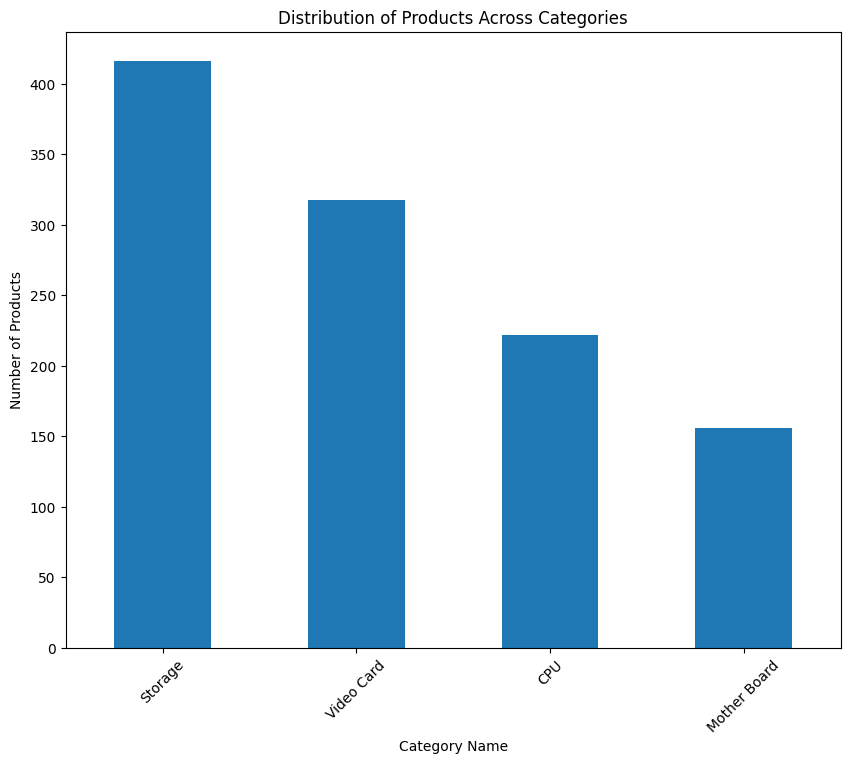

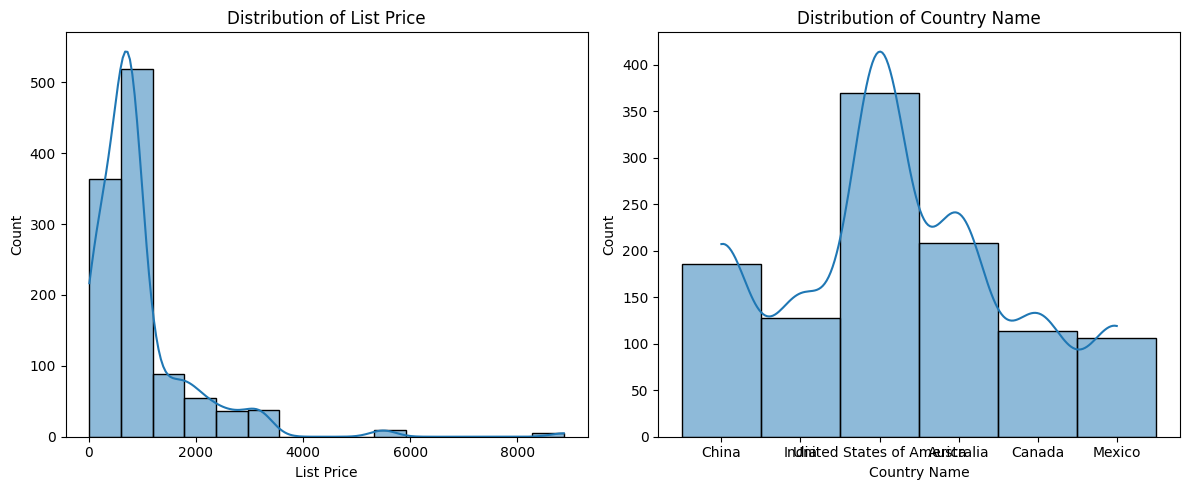

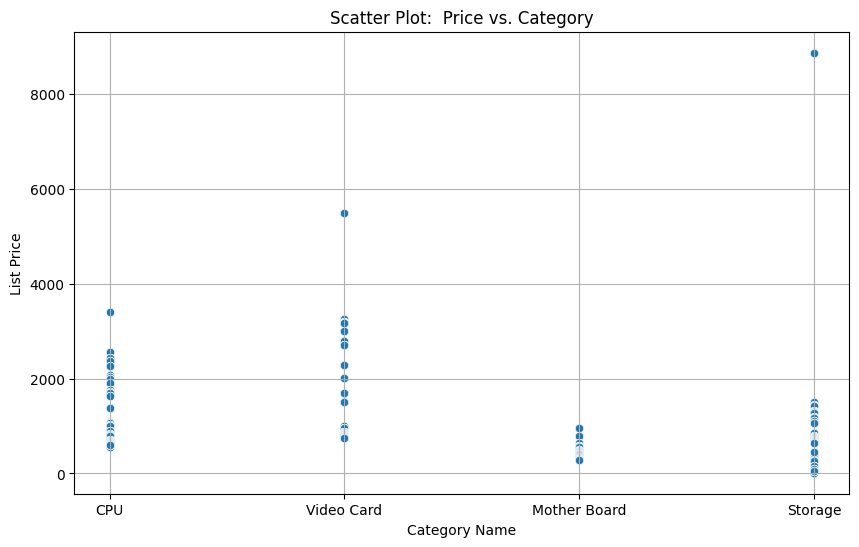

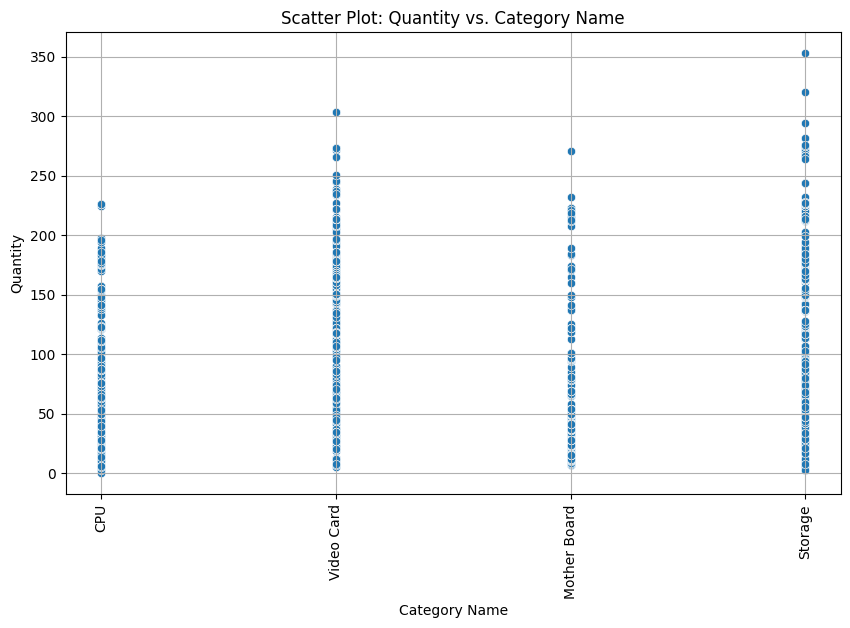

In [ ]:
# Visualization of Products Across Categories
category_counts = df['CATEGORY_NAME'].value_counts()
plt.figure(figsize=(10, 8))
category_counts.plot(kind='bar')
plt.title('Distribution of Products Across Categories')
plt.xlabel('Category Name')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()


# Summary statistics
summary_stats = df[['CATEGORY_NAME', 'LIST_PRICE']].describe()

# Histogram for LIST_PRICE distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['LIST_PRICE'], bins=15, kde=True)
plt.title('Distribution of List Price')
plt.xlabel('List Price')

# Histogram for COUNTRY_NAME distribution
plt.subplot(1, 2, 2)
sns.histplot(df['COUNTRY_NAME'], bins=15, kde=True)
plt.title('Distribution of Country Name')
plt.xlabel('Country Name')

plt.tight_layout()

# Scatterplot for LIST_PRICE vs. CATEGORY_NAME
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, y='LIST_PRICE', x='CATEGORY_NAME')
plt.title('Scatter Plot:  Price vs. Category')
plt.ylabel('List Price')
plt.xlabel('Category Name')
plt.grid(True)
plt.show()


category_counts = df['CATEGORY_NAME'].value_counts()

# Category with the Highest Number of Products
highest_category = category_counts.idxmax()
highest_number = category_counts.max()

highest_category_data = df[df['CATEGORY_NAME'] == highest_category]

# Scatterplot for QUANTITY vs. CATEGORY
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CATEGORY_NAME', y='QUANTITY')
plt.title('Scatter Plot: Quantity vs. Category Name')
plt.xlabel('Category Name')
plt.ylabel('Quantity')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

**3.1 Product with the highest price within each category**

In [ ]:
#The row with the highest price in the LIST_PRICE column
idx_highest_price = df['LIST_PRICE'].idxmax()

# Get the product name and category name associated with the highest price
product_with_highest_price = df.loc[idx_highest_price, 'PRODUCT_NAME']
category_of_highest_price = df.loc[idx_highest_price, 'CATEGORY_NAME']

print("Product with the highest price:", product_with_highest_price)
print("Category of the product with the highest price:", category_of_highest_price)


Product with the highest price: Intel SSDPECME040T401
Category of the product with the highest price: Storage


**4. Cost and Price Analysis**
- Calculate the average standard cost and average list price.
- Identify the product with the highest standard cost and the one with the highest list price.

In [ ]:
# The average standard cost and average list price
average_standard_cost = df['STANDARD_COST'].mean()
average_list_price = df['LIST_PRICE'].mean()

# Product with the Highest standard cost and the one with the Highest list price
highest_standard_cost_product = df.loc[df['STANDARD_COST'].idxmax()]['PRODUCT_NAME']
highest_list_price_product = df.loc[df['LIST_PRICE'].idxmax()]['PRODUCT_NAME']


**5. Location Analysis**
- Determine the location (city or state) with the highest quantity of products in stock.

In [ ]:
# Group the data by location (city or state) and sum the quantities
location_quantity = df.groupby(['CITY', 'STATE'])['QUANTITY'].sum()

# The location with the highest quantity of products
highest_quantity_location = location_quantity.idxmax()

# Print the results
print("Average Standard Cost:", average_standard_cost)
print("Average List Price:", average_list_price)
print("Product with the Highest Standard Cost:", highest_standard_cost_product)
print("Product with the Highest List Price:", highest_list_price_product)
print("Location with the Highest Quantity of Products:", highest_quantity_location)


Average Standard Cost: 765.520404676259
Average List Price: 950.9933273381293
Product with the Highest Standard Cost: Intel SSDPECME040T401
Product with the Highest List Price: Intel SSDPECME040T401
Location with the Highest Quantity of Products: ('South San Francisco', 'California')


**6. Insights and Reporting:**
- Summarize your findings and insights from the data analysis.
- Create a report or presentation that includes visualizations and explanations.

In [ ]:
report = """
Analysis Report
1. Data Loading and Initial Analysis:
  Basic statistics of the Dataset:
  {}

2. Cost and Price Analysis:
  Average Standard Cost : {}
  Average List Price : {}
  Product with the Highest Standard Cost :
  {}
  Product with the Highest List Price :
  {}


3. Location Analysis:
  Location with the Highest Quantity of Products :
  {}

4. Data Visualization:
Bar Chart displaying distribution of products across categories.
Histogram showing distribution of List Price.
Histogram showing distribution of Country Name.
Scatter Plot showing List Price vs. Category.
Scatter Plot showing Quantity vs. Category.

5. Insights:
  The product with the highest price : {}


""".format(statistics, average_standard_cost, average_list_price, highest_standard_cost_product,
           highest_list_price_product, highest_quantity_location, product_with_highest_price, )

print(report)



Analysis Report
1. Data Loading and Initial Analysis:
  Basic statistics of the Dataset:
         CATEGORY_ID   PRODUCT_ID  STANDARD_COST   LIST_PRICE    REGION_ID  \
count  1112.000000  1112.000000    1112.000000  1112.000000  1112.000000   
mean      3.203237   139.579137     765.520405   950.993327     2.469424   
std       1.637782    84.840057     794.252142   991.070482     0.499289   
min       1.000000     2.000000      12.630000    15.550000     2.000000   
25%       2.000000    71.750000     332.380000   435.222500     2.000000   
50%       4.000000   133.000000     582.020000   744.980000     2.000000   
75%       5.000000   216.000000     799.050000   999.990000     3.000000   
max       5.000000   288.000000    7123.660000  8867.990000     3.000000   

       LOCATION_ID  WAREHOUSE_ID     QUANTITY  
count  1112.000000   1112.000000  1112.000000  
mean     10.971223      5.548561   107.474820  
std       4.662225      2.416821    68.008413  
min       5.000000      1.00000